# Preparación del entorno
Primero debemos instalar e importar las librerias necesarias para hacer la ejecución de nuestro código

In [38]:
%pip install pandas
%pip install numpy
%pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import unicodedata

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Ahora al momento de hacer esto debemos cargar neustra información (el archivo con los datos) dentro de una variable, por lo cual vamos a tomar el excel y asignarlo a una variable:

In [28]:
df = pd.read_excel('Datos_proyecto.xlsx')

Ahora gracias a que cargamos el dataset, podemos empezar a hacer el entendimiento de sus filas y datos agregados!!!

# 1. Entendimiento del dataset
Es necesario entender el dfset antes de hacer el proceso de limpieza y calidad de datos, y por supuesto el de clasificación

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   textos  2424 non-null   object
 1   labels  2424 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.0+ KB


In [30]:
print("Primeras filas del DataFrame:")
print(df.head())
print("\n-------------------------------------------------------------\n")
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])

Primeras filas del DataFrame:
                                              textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3

-------------------------------------------------------------

Número de filas: 2424
Número de columnas: 2


In [31]:
df['labels'].value_counts()

labels
4    1025
3     894
1     505
Name: count, dtype: int64

Con este ultimo codigo podemos ver la distribución de los ODS con respecto a los textos, podemos incluso verlo en un diagrama de pastel para mejor visualización y entendimiento

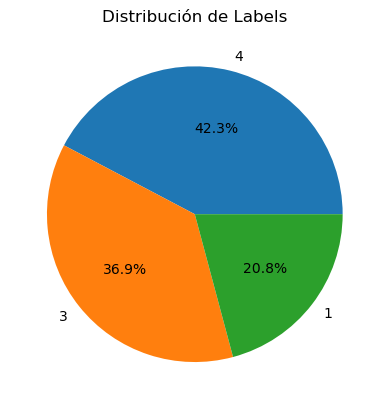

In [32]:
counts = df['labels'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribución de Labels")
plt.show()

In [36]:
print("Cantidad de valores nulos dentro del DataFrame:")
print(df.isnull().sum())

print("Número de duplicados:", df.duplicated().sum())

Cantidad de valores nulos dentro del DataFrame:
textos    0
labels    0
dtype: int64
Número de duplicados: 0


In [ ]:
df['longitud'] = df['textos'].astype(str).apply(lambda x: len(x.split()))

print(df['longitud'].describe())


print("Texto más corto:\n", df.loc[df['longitud'].idxmin(), 'textos'])
print("Texto más largo:\n", df.loc[df['longitud'].idxmax(), 'textos'])

count    2424.000000
mean      107.924092
std        35.575349
min        41.000000
25%        81.000000
50%       102.000000
75%       129.000000
max       260.000000
Name: longitud, dtype: float64
Texto más corto:
 Pacto internacional de derechos económicos, sociales y culturales", Treaty Series, vol. Mejorando la protección social y reduciendo la vulnerabilidad en un mundo globalizado" (E/CN.5/2001), consultado en http://www.icsw.org/un-news/pdfs/csdsocprotect.PDF el 5 de octubre de 2010. Human Informe de Desarrollo, 2010 (Nueva York, Oxford).
Texto más largo:
 El cuarenta y tres por ciento de las personas de 25 a 34 años han completado la educación secundaria (en comparación con el promedio de la OCDE del 82 %) y el 19 % han obtenido la educación terciaria (en comparación con el promedio de la OCDE del 39 %). Turquía ha logrado una mejora significativa en las evaluaciones PISA en matemáticas (de 2003 a 2009) y ciencias (de 2006 a 2009), pero sigue siendo uno de los países con el de

# 2. Limpieza y tratado de datos
Ahora tras haber revisado los datos, procederemos a hacer una cuidadosa limpieza de estos, para tener todos dentro de un mismo estandar.

In [ ]:
def quitar_acentos(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = str(texto).lower()
    texto = quitar_acentos(texto)
    texto = re.sub(r"http\S+|www\.\S+", " ", texto)
    texto = re.sub(r"[^a-zñáéíóúü\s]", " ", texto)
    texto = re.sub(r"\s+", " ", texto).strip()
    palabras = [p for p in texto.split()]
    return " ".join(palabras)

df['textos_limpios'] = df['textos'].apply(limpiar_texto)
df['longitud_actualizada'] = df['textos_limpios'].astype(str).apply(lambda x: len(x.split()))
df.head()

,textos,labels,longitud,textos_limpios,longitud_actualizada
0,"""Aprendizaje"" y ""educación"" se consideran sinó...",4,48,aprendizaje y educacion se consideran sinonimo...,48
1,Para los niños más pequeños (bebés y niños peq...,4,72,para los ninos mas pequenos bebes y ninos pequ...,71
2,"Además, la formación de especialistas en medic...",3,93,ademas la formacion de especialistas en medici...,92
3,En los países de la OCDE se tiende a pasar de ...,4,109,en los paises de la ocde se tiende a pasar de ...,109
4,Este grupo se centró en las personas que padec...,3,94,este grupo se centro en las personas que padec...,93


Si bien en el caso de ejemplo no tuvimos ningun valor nulo o duplicado vamos a asegurarnos que en el dataframe que pase por este codigo no tenga valores nulos o duplicados

In [42]:
print("Número de filas antes de limpieza:", df.shape[0])

f = df.dropna(subset=['textos', 'labels'])
df = df.drop_duplicates(subset=['textos'])
df = df.reset_index(drop=True)

print("Número de filas después de limpieza:", df.shape[0])

Número de filas antes de limpieza: 2424
Número de filas después de limpieza: 2424


In [43]:
ratio = counts / counts.sum()
display(ratio.to_frame('proporcion'))

,proporcion
labels,
4,0.422855
3,0.368812
1,0.208333
